In [12]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio

# name of the input file
imname = '../cs180 proj1 data/church.tif'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)
    
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]
print(b.shape, g.shape, r.shape)


(3202, 3634) (3202, 3634) (3202, 3634)


In [ ]:
# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

def align(color1, color2):
    best_shifted = color1
    size = color1.shape
    sizex = size[0]
    sizey = size[1]
    cropx = sizex // 5
    cropy = sizey // 5
    #Maximum check a 1000x1000 center region
    # crop1 = color1[cropx:-cropx, cropy:-cropy]
    # crop2 = color2[cropx:-cropx, cropy:-cropy]
    crop1 = color1[max(sizex//2 - 100, 0):min(sizex//2 + 100, sizex), max(sizey//2 - 100, 0):min(sizey//2 + 100, sizey)]
    crop2 = color2[max(sizex//2 - 100, 0):min(sizex//2 + 100, sizex), max(sizey//2 - 100, 0):min(sizey//2 + 100, sizey)]
    # normalized1 = crop1 / np.linalg.norm(crop1) # Normalized cross-correlation
    # error = np.sum(normalized1 * normalized2)
    min_error = np.inf
    best_shift = (-20, -20)
    # normalized2 = crop2 / np.linalg.norm(crop2)

    for x in range(-15, 16):
        for y in range(-15, 16):
            shifted = np.roll(crop1, (x, y), axis=(0, 1))
            error = np.sum((shifted - crop2) ** 2) # L2 error
            if error < min_error:
                min_error = error
                best_shifted = shifted
                best_shift = (x, y)
    # print(crop1.shape, crop2.shape)
    # shiftWindow = np.arange(-15, 16)
    # all_shifted = np.array([np.roll(crop1, (x, y), axis=(0, 1)) for x in shiftWindow for y in shiftWindow])
    # L2_errors = np.sum((all_shifted[:, :, :] - crop2) ** 2, axis=(1, 2))
    # min_idx = np.argmin(L2_errors)
    # best_shift = (min_idx // 31 - 15, min_idx % 31 - 15)

    print(best_shift)
    return best_shift

def pyramid_align(color1, color2):
    if len(color1) < 400 and len(color1[0]) < 400:
        return align(color1, color2)
    # gaussian = [[0.0625, 0.125 , 0.0625], #Gaussian filter
    #             [0.125 , 0.25  , 0.125 ],
    #             [0.0625, 0.125 , 0.0625]]
    # filter1 = np.convolve(color1, gaussian, mode='same') 
    # filter2 = np.convolve(color2, gaussian, mode='same')
    # small1 = filter1[::2, ::2]
    # small2 = filter2[::2, ::2]
    small1 = sk.transform.resize(color1, (color1.shape[0]//2, color1.shape[1]//2), anti_aliasing=True)
    small2 = sk.transform.resize(color2, (color2.shape[0]//2, color2.shape[1]//2), anti_aliasing=True)
    print(small1.shape, small2.shape)
    shift = pyramid_align(small1, small2)

    shiftColor1 = np.roll(color1, (shift[0]*2, shift[1]*2), axis=(0, 1))
    temp = align(shiftColor1, color2)
    return (shift[0]*2 + temp[0], shift[1]*2 + temp[1])

In [14]:
# shift_g = align(g, b)
# shift_r = align(r, b)
shift_g = pyramid_align(g, b)
shift_r = pyramid_align(r, b)

print(shift_g, shift_r)


(1601, 1817) (1601, 1817)
(800, 908) (800, 908)
(400, 454) (400, 454)
(200, 227) (200, 227)
(0, 0)
(0, -1)
(0, 1)
(12, 4)
(1, 0)
(1601, 1817) (1601, 1817)
(800, 908) (800, 908)
(400, 454) (400, 454)
(200, 227) (200, 227)
(3, -1)
(0, 1)
(1, 0)
(3, 2)
(0, 0)
(25, 4) (58, -4)


(3202, 3634, 3)


/var/folders/r8/0ypdsyg95pj831d819dhf8100000gn/T/ipykernel_23070/46921568.py:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(base)
/var/folders/r8/0ypdsyg95pj831d819dhf8100000gn/T/ipykernel_23070/46921568.py:15: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


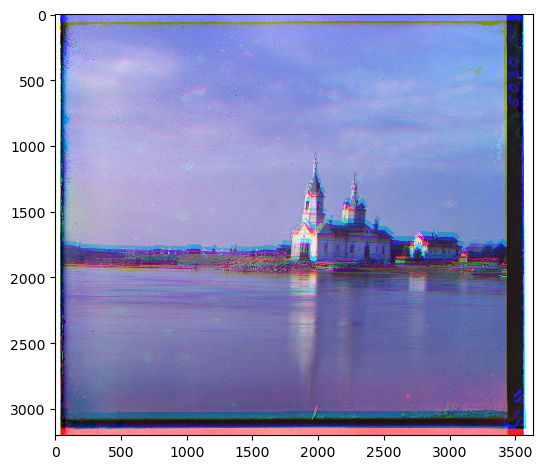

/var/folders/r8/0ypdsyg95pj831d819dhf8100000gn/T/ipykernel_23070/46921568.py:16: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.imshow(cropped_im)
/var/folders/r8/0ypdsyg95pj831d819dhf8100000gn/T/ipykernel_23070/46921568.py:17: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skio.show()


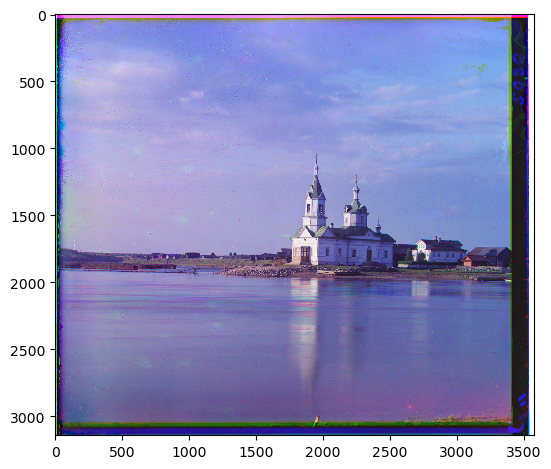

In [15]:
ag = np.roll(g, shift_g, axis=(0, 1))
ar = np.roll(r, shift_r, axis=(0, 1))
# create a color image
im_out = np.dstack([ar, ag, b])
cropped_im = im_out[30:-30, 30:-30, :]
base = np.dstack([r, g, b])
print(im_out.shape)

# save the image
fname = '../out_path/out_fname.jpg'
# skio.imsave(fname, im_out)

# display the image
skio.imshow(base)
skio.show()
skio.imshow(cropped_im)
skio.show()